<a href="https://colab.research.google.com/github/TangoDan/Hello-World/blob/main/Transcribir_y_Traducir_OpenAI_Whisper_(Jason_Boog_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Jason Boog](https://medium.com/@jasonboog)

OpenAI's Whisper is a general-purpose speech recognition model that you can use to transcribe or translate audio files. You can use Whisper for free on a GPU using this Google Colab notebook.

Thanks to ByteXD for [this video introduction](https://youtu.be/-KyqrwdTsN0).

For more information about Whisper, you can visit [this GitHub repository](https://github.com/openai/whisper).

Before we get started, save a copy of this Google Colab notebook to your Google Drive. Just open the File menu and choose "Save a Copy in Drive."

Open your copy of the Colab notebook on Google Chrome, and follow these steps to transcribe and translate.

# Modificaciones Álex Goia
He modificado el archivo de Jason para personalizarlo para nuestro caso. Graciais Jason!

Aquí vamos a ver:
1. Extraer el texto del video mediante Youtube (el audio también lo extrae, no me seas piratilla)
2. Extraer el texto de cualquier audio
3. Traducir con muy buena calidad cualquier idioma a Inglés (perfecto para añadir subtítulos en esta plataforma)


# Instalamos las dependencias

Instala las depencencias necesiaras.
Whisper
Youtube-dl
Googletrans


In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install yt-dlp
!pip install ipywidgets



  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-n31nhzs9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-n31nhzs9
  Resolved https://github.com/openai/whisper.git to commit 248b6cb124225dd263bb9bd32d060b6517e067f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Instalamos ffmpeg

You need to install [ffmpeg](https://ffmpeg.org), a cross-platform solution to record, convert and stream audio and video. Just run the cell to install.

In [ ]:
!sudo apt update && sudo apt install ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [79.8 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,059 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd6

# Opción 1: Obtenemos el audio de un video de Youtube


Obtenemos el audio. Aquí debes cambiar el contenido de LINK (No olvides dejar las comillas).

In [ ]:
import os

#Cambia el link que quieras
LINK = "https://www.youtube.com/watch?v=-kleBcTefVw"

# Descargar el audio del video de YouTube en formato mp3 y guardar como 'audio.mp3'
!yt-dlp -x --audio-format mp3 --output 'audio.%(ext)s' {LINK}

print("¡Descarga completada!")

[youtube] Extracting URL: https://www.youtube.com/watch?v=-kleBcTefVw
[youtube] -kleBcTefVw: Downloading webpage
[youtube] -kleBcTefVw: Downloading android player API JSON
[info] -kleBcTefVw: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3
¡Descarga completada!


# Opción 2: Subir tu propio archivo .mp3

En la parte de Archivos sube tu .mp3 sino deseas descargar de Youtube. Es importante que lo llames audio.mp3. Botón derecho > Subir

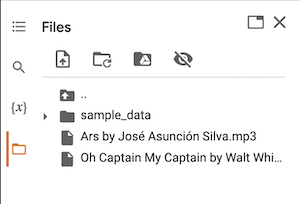




## Selecciona el idioma del audio
Como muchos lo habéis pedido he añadido este apartado para que selecciones el idioma del audio antes para ofrecer. Ejecuta, espera a que aparezca un desplegable selecciona el idioma.

In [ ]:
import ipywidgets as widgets

dropdown_options = [
    ('Español', 'es'),
    ('Inglés', 'en'),
    ('Francés', 'fr'),
    ('Afrikáans', 'af'),
    ('Amhárico', 'am'),
    ('Árabe', 'ar'),
    ('Asamés', 'as'),
    ('Azerbaiyano', 'az'),
    ('Bashkir', 'ba'),
    ('Bielorruso', 'be'),
    ('Búlgaro', 'bg'),
    ('Bengalí', 'bn'),
    ('Tibetano', 'bo'),
    ('Bretón', 'br'),
    ('Bosnio', 'bs'),
    ('Catalán', 'ca'),
    ('Checo', 'cs'),
    ('Galés', 'cy'),
    ('Danés', 'da'),
    ('Alemán', 'de'),
    ('Griego', 'el'),
    ('Estonio', 'et'),
    ('Vasco', 'eu'),
    ('Persa', 'fa'),
    ('Finlandés', 'fi'),
    ('Feroés', 'fo'),
    ('Gallego', 'gl'),
    ('Gujarati', 'gu'),
    ('Hausa', 'ha'),
    ('Hawaiano', 'haw'),
    ('Hindi ', 'hi' ),
    ('Croata ', 'hr' ),
    ('Criollo haitiano ', 'ht' ),
    ('Húngaro ', 'hu' ),
    ('Armenio ', 'hy' ),
    ('Indonesio ', 'id' ),
    ('Islandés ', 'is' ),
    ('Italiano ', 'it' ),
    ('Hebreo ', 'iw' ),
    ('Japonés ', 'ja' ),
    ('Javanés ', 'jw' ),
    ('Georgiano ', 'ka' ),
    ('Kazajo ', 'kk' ),
    ('Jemer ', 'km' ),
    ('Canarés ', 'kn' ),
    ('Coreano ', 'ko' ),
]

dropdown = widgets.Dropdown(
    options=dropdown_options,
    value=dropdown_options[0][1],  # El valor predeterminado es el valor del primer elemento.
    description='Idioma:',
)
display(dropdown)

Dropdown(description='Selecciona el idioma del audio:', options=(('Español', 'es'), ('Inglés', 'en'), ('Francé…

# Transcribir

He añadido una opción para seleccionar el idioma origen para asegurarse que no da fallos.

In [ ]:
display("Has seleccionado idioma: " + dropdown.value)
!whisper "audio.mp3" --model large --language {dropdown.value}


'Has seleccionado idioma: en'

[00:00.000 --> 00:07.000]  What's up, dude?
[00:07.000 --> 00:09.000]  Yo, what's going on, man?
[00:09.000 --> 00:13.000]  Who do we got today? Liz and Lucas Herman. I'm excited about this one.
[00:13.000 --> 00:14.000]  The Hermans.
[00:14.000 --> 00:20.000]  You know what I'm excited about, Luke? And his wife, Liz. They're sort of a team running this company together.
[00:20.000 --> 00:27.000]  Their app, I think they make $8,000 a month. That was back in January, so maybe it's more now.
[00:27.000 --> 00:34.000]  They have this very simple tool that I think anybody would look at and be like, I could build this in a weekend.
[00:34.000 --> 00:36.000]  Usually it's not a weekend, like six months or something.
[00:36.000 --> 00:42.000]  I could build this very easily by myself, but they're making $100,000 a year from it.
[00:42.000 --> 00:46.000]  And also, he was working as a software engineer. I think he went to college.
[00:46.000 --> 00:49.000]  He was a software engineer. He was 

# Acortar subtíutlos .srt
Algunos me habeis dicho que es demasiado largo el subtítulo, he añadido este script para acortarlo. Cambia el MAX_LINE_LENGTH a lo que mejor te venga. La bbs recomienda un tamaño máximo de 37

In [ ]:
!pip install pysrt
import pysrt

MAX_LINE_LENGTH = 37

subs = pysrt.open('audio.mp3.srt')
for sub in subs:
    sub.text = sub.text[:MAX_LINE_LENGTH]

subs.save('shortened_subtitles.srt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13443 sha256=e2a54a45371972ec97a91ca96f5e008827df362b555b3d028bf0bbfef0ed2dbe
  Stored in directory: /root/.cache/pip/wheels/30/a6/ab/4705174e11f44e74d58c14b32edbacbc852644f86658316aef
Successfully built pysrt


# Traducir al inglés

Si ejecutas este bloque el audio que hayas subido se traducirá en inglés.
Idioma de origen: Cualquiera (Autodetección)
Idioma de salida: Inglés

In [ ]:
!whisper "audio.mp3" --task translate

2023-02-18 12:08:56.112722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 12:08:58.217710: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-18 12:08:58.217850: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-18 12:08:58.217869: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

# License

MIT License

Copyright (c) 2022 Jason Boog

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.